<a href="https://colab.research.google.com/github/Arif111866/Machine_learning_LAB/blob/main/PCA_analysis_for_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



# 1. Load dataset

In [20]:
# Load wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
class_names = wine.target_names

print("Dataset shape:", X.shape)
print("Target classes:", class_names)


Dataset shape: (178, 13)
Target classes: ['class_0' 'class_1' 'class_2']




# 2. Show some random samples

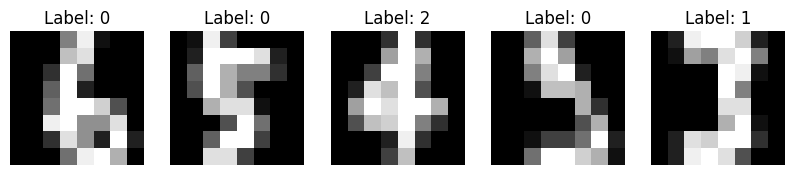

In [21]:
# Display 5 random digits from dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, idx in zip(axes, np.random.randint(0, len(X), 5)):
    ax.imshow(digits.images[idx], cmap="gray")
    ax.set_title(f"Label: {y[idx]}")
    ax.axis("off")
plt.show()


In [22]:
# Standardize features (mean=0, var=1) before PCA
X_std = StandardScaler().fit_transform(X)

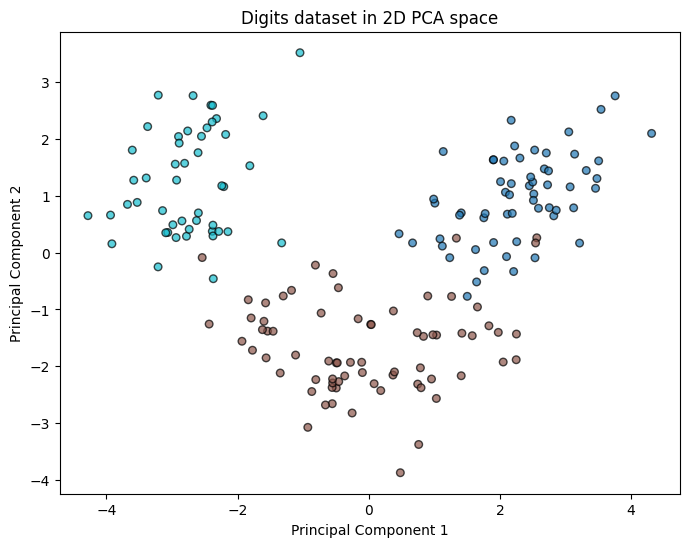

In [23]:
# Reduce to 2D for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_std)

# Scatter plot in PCA space
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap="tab10", s=30, alpha=0.7, edgecolor="k")
plt.title("Digits dataset in 2D PCA space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Legend
legend = plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.gca().add_artist(legend)
plt.show()


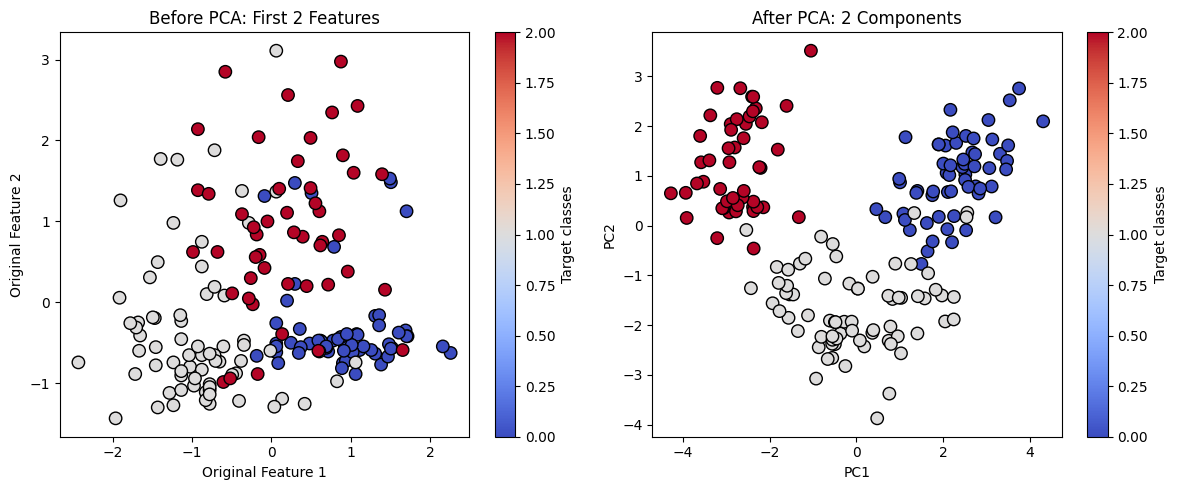

In [25]:
# Reduce to 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_std)

# Side-by-side: Before vs After PCA
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12,5))

# Before PCA (first 2 standardized features)
plt.subplot(1,2,1)
plt.scatter(X_std[:,0], X_std[:,1], c=y_numeric, cmap="coolwarm", edgecolor="k", s=80)
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("Before PCA: First 2 Features")
plt.colorbar(label="Target classes")

# After PCA (2 PCs)
plt.subplot(1,2,2)
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y_numeric, cmap="coolwarm", edgecolor="k", s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("After PCA: 2 Components")
plt.colorbar(label="Target classes")

plt.tight_layout()
plt.show()


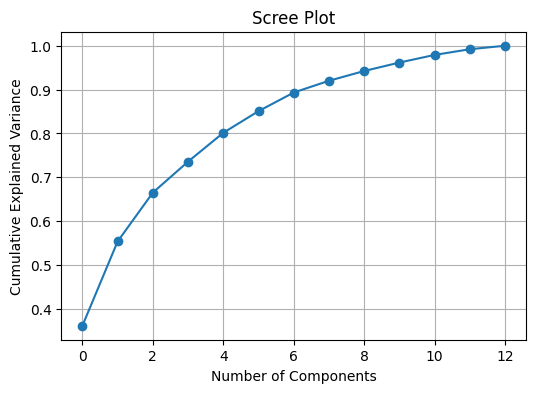

In [26]:
pca = PCA().fit(X_std)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()



--- Original Features ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



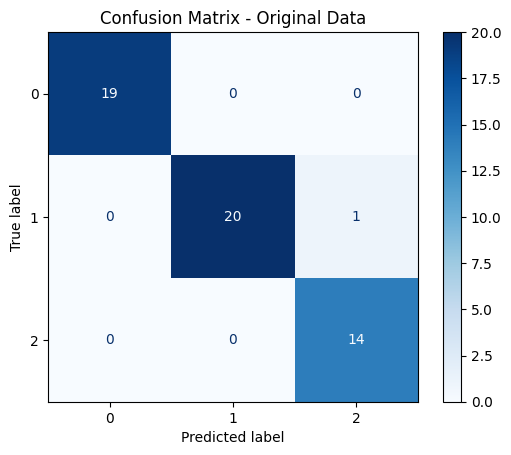


--- PCA Reduced (2 PCs) ---
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



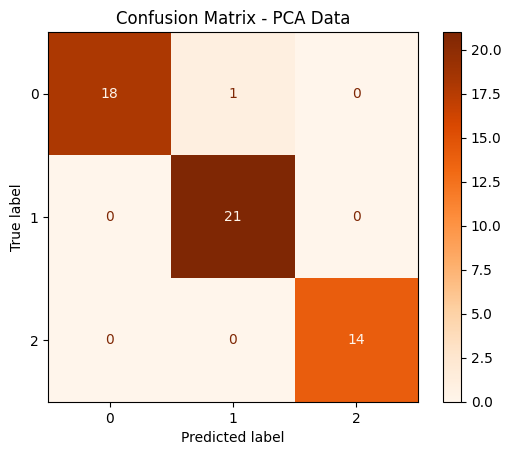

In [27]:
# Keep 2 PCs for classification
X_pca = PCA(n_components=2).fit_transform(X_std)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train classifiers
clf_orig = LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf_pca  = LogisticRegression(max_iter=1000).fit(Xp_train, yp_train)

# Predictions
y_pred_orig = clf_orig.predict(X_test)
y_pred_pca  = clf_pca.predict(Xp_test)

# Reports + confusion matrices
print("\n--- Original Features ---")
print(classification_report(y_test, y_pred_orig))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_orig)).plot(cmap="Blues")
plt.title("Confusion Matrix - Original Data")
plt.show()

print("\n--- PCA Reduced (2 PCs) ---")
print(classification_report(yp_test, y_pred_pca))
ConfusionMatrixDisplay(confusion_matrix(yp_test, y_pred_pca)).plot(cmap="Oranges")
plt.title("Confusion Matrix - PCA Data")
plt.show()
